# Advance Visualisation and EDA 

In [55]:
#! conda install basemap
#! conda install basemap-data-hires
#! pip3 install Pillow

In [56]:
import pandas as pd
import numpy as np
import os
os.environ["PROJ_LIB"] = "C:\\Users\\chand\\anaconda3\\Library\\share"
import matplotlib.pyplot as plt
import seaborn as sns 
from mpl_toolkits.basemap import Basemap
%matplotlib inline

In [57]:
df_event = pd.read_csv('event_data.csv')
df_non_event = pd.read_csv('non_event_data.csv')

In [58]:
df_event.head(2)

,Unnamed: 0,device_id,gender,age,group,event_id,timestamp,longitude,latitude,has_event,week_day,hour_day,week,year,group_cat
0,0,-7548291590301750000,M,33,M32+,414.0,2016-05-03 00:05:31,116.79,33.98,1,Tuesday,0,18,2016,33-45
1,1,-7548291590301750000,M,33,M32+,2604805.0,2016-05-04 03:01:32,116.79,33.98,1,Wednesday,3,18,2016,33-45


In [59]:
data_points_to_select = 100000
any_x_events = df_event[(df_event.longitude > 0) & (df_event.latitude > 0)].sample(n = data_points_to_select)

### 1. Plot the visualisation plot for a sample of 1 lakh data points.

C:\Users\chand\anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed two minor releases later. Use inspect.cleandoc instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\chand\anaconda3\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed two minor releases later. Use inspect.cleandoc instead.
  from ipykernel import kernelapp as app


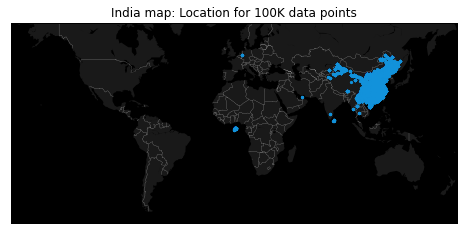

In [60]:
fig = plt.figure(figsize=(8, 8))

# Mercator of World
m = Basemap(projection='merc',
             llcrnrlat=-60,
             urcrnrlat=65,
             llcrnrlon=-180,
             urcrnrlon=180,
             lat_ts=0, #latitude of true scale
             resolution='c') #resolution of boundary dataset being used - c for crude


m.fillcontinents(color='#191919',lake_color='#000000') # dark grey land, black lakes
m.drawmapboundary(fill_color='#000000')                # black background
m.drawcountries(linewidth=0.15, color="w")              # thin white line for country borders

# Plot the data
mxy = m(any_x_events["longitude"].tolist(), any_x_events["latitude"].tolist())
m.scatter(mxy[0], mxy[1], s=5, c="#1292db", zorder=2)    # zorder for the points  

plt.title("India map: Location for 100K data points")
plt.show()

### 2.Compare the event visualisation plots based on the users' gender information. [This can be done on the sample of 1 lakh data points.]

C:\Users\chand\anaconda3\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed two minor releases later. Use inspect.cleandoc instead.
  if sys.path[0] == '':
C:\Users\chand\anaconda3\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed two minor releases later. Use inspect.cleandoc instead.


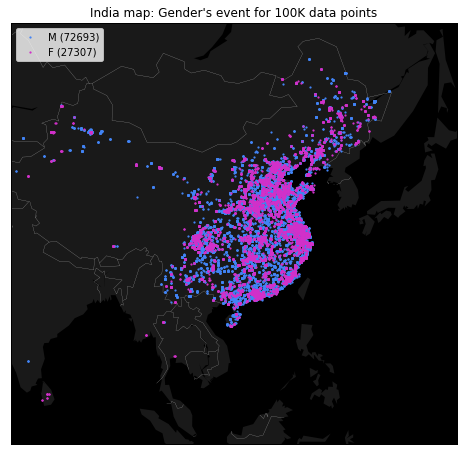

In [61]:
fig = plt.figure(figsize=(8, 8))
classes=['M','F']
classes_color = ['#4284f5','#d130c9'] 

# Mercator of World
m = Basemap(projection='merc',
             llcrnrlat=0,
             urcrnrlat=55,
             llcrnrlon=75,
             urcrnrlon=145,
             lat_ts=0, #latitude of true scale
             resolution='c') #resolution of boundary dataset being used - c for crude


m.fillcontinents(color='#191919',lake_color='#000000') # dark grey land, black lakes
m.drawmapboundary(fill_color='#000000')                # black background
m.drawcountries(linewidth=0.15, color="w")              # thin white line for country borders

# Plot the data
for i,grp in enumerate(classes):
    filtered_data = any_x_events[any_x_events.gender.str.strip() == grp.strip()]
    x,y = m(filtered_data["longitude"].tolist(), filtered_data["latitude"].tolist())
    m.scatter(x, y, s=5, c=classes_color[i], label=str(grp+' ('+str(filtered_data.gender.count())+')') ,lw=0, alpha=1, zorder=5)    # zorder for the points  

plt.title("India map: Gender's event for 100K data points")
plt.legend()
plt.show()

Observation: